# 6. Support Vector Machine

이번 시간에는 Support Vector Machine(SVM)에 대해 알아봅시다.

먼저, 배경 이론에 대해 공부해볼 것이고 SVM을 함께 구현해 볼 것입니다.

이후 <i>kernel</i>이라 부르는 것을 사용하여 SVM을 어떻게 확장시킬 것인지 공부해봅시다.

손글씨 인식 예제를 이번에는 SVM을 이용하여 다시 실습해보는 것으로 실습을 마칩시다.

## Support Vector Machine의 장/단점

### 장점
- Generalization error(처음 보는 데이터에 대한 error)가 작다.
- 계산량이 적다.
- 결과를 해석하기 쉽다.

### 단점
- Parameter tuning과 어떤 kernel을 골랐느냐에 민감하다.
- 기본적으로는 binary classification에만 사용될 수 있다.

## 개념 1 : <i> Linearly separable </i>하다는 것은?

<img src="./img/6_1.png"></img>

위의 그림에서, <i>직선 하나를 그어 한 쪽에는 하나의 class의 점들만, 다른 한 쪽에는 다른 하나의 class의 점들만 있도록</i> 나눌 수 있는 그림은 어느 것일까요?

이처럼, 직선 하나를 그어서 두 class를 양분할 수 있는 상황을 <i>linearly separable</i>한 상황이라고 말합니다.

(위의 조건이 너무 완벽한 상황만을 가정하고 있기 때문에, 우리는 이후에 이 조건을 조금 완화시켜 생각할 것입니다.)

이 때, 나누는 직선을 <i>separating hyperplane</i>이라고 부릅니다. 데이터를 양분하는 것이 2차원 데이터에서는 1차원 직선, 3차원 데이터에서는 2차원 평면, ..., n차원 데이터에서는 n-1차원 초평면(hyperplane)이기 때문이죠!

## 개념 2 : Support vectors

<img src="./img/6_2.jpg"></img>

위 그림의 B-D는 모두 두 class를 양분하는 hyperplane을 나타내고 있습니다. 여기서 어떤 것이 두 class를 <b>가장 잘</b> 양분하고 있나요?

이를 정량적으로 생각하기 위하여 도입한 개념이 바로 <i>margin</i>과 <i>support vector</i>입니다.

<b><i>margin</i>이란, hyperplane에 가장 가까운 점과 hyperplane 사이의 거리를 뜻합니다.</b>

<b><i>support vector</i>란, separating hyperplane에 가장 가까운 점들을 뜻합니다.</b>

결국 우리가 원하는 것은 위의 그림의 D처럼 margin이 가장 큰 hyperplane을 찾는 것입니다!

### Maximum margin 찾기

고등학교 수학을 떠올려봅시다. 공간상의 한 점 $ A = \mathbf{x'} $에서 hyperplane $ \mathbf{w^Tx} + b $ 까지의 거리는 어떻게 구할까요?

바로 

\begin{equation*}
\frac{|\mathbf{w^Tx'}+b|}{||\mathbf{w}||}
\end{equation*}

입니다. 이를 <b>식 (1)</b>이라 합시다.

$ y $ 를 정의합시다.

\begin{equation*}
y_i = \begin{cases} 1 & \text{if } x_i = positive class \\
                     -1 & \text{if } x_i = negative class      %
        \end{cases}
\end{equation*}

이를 <b>식 (2)</b>라 합시다.

<i>Margin</i>값을 비교할 때, 우리는 $ y_i * (\mathbf{w^Tx_i}+b) $ 값만을 비교할 것입니다. 밑의 성질이 성립하기 때문입니다.

- 어떤 점의 label >= 0 이고, separating hyperplane으로부터 멀리 떨어져있다면 $ y_i * (\mathbf{w^Tx_i}+b) $ 은 큰 양수 값을 갖는다.
- 어떤 점의 label < 0 이고, separating hyperplane으로부터 멀리 떨어져있다면 $ y_i * (\mathbf{w^Tx_i}+b) $ 은 큰 양수 값을 갖는다.

따라서 $ \mathbf{w} $와 $ b $가 주어졌을 때, margin의 값은 

\begin{equation*}
\min\limits_{n}(y_i * (\mathbf{w^Tx_i}+b))\bullet\frac{1}{||\mathbf{w}||}
\end{equation*}

가 되고, 우리가 구할 w, b의 값은

\begin{equation*}
\underset{w, b}{\mathrm{argmax}}\{\min\limits_{n}(y_i * (\mathbf{w^Tx_i}+b))\bullet\frac{1}{||\mathbf{w}||}\}
\end{equation*}

이 됩니다.

곱을 최적화하는 것은 어려우므로, 제약 조건을 걸어줍시다.

<b>모든 support vector에 대해서 $ y_i * (\mathbf{w^Tx_i}+b) = 1$이라고 가정합시다.</b>

Support vector는 hyperplane에 가장 가까운 점이므로, $ y_i * (\mathbf{w^Tx_i}+b) $값이 가장 작습니다. 

따라서 우리의 제약 조건은 

\begin{equation*}
y_i * (\mathbf{w^Tx_i}+b) \geq 1
\end{equation*}

입니다.

이렇게 제약 조건이 있는 최적화 문제를 풀 때 <b>라그랑주 승수법</b>이라는 방법을 사용한다고 합니다. 자세한 방법은 실습시간에 다루고, 여기서는 생략하겠습니다.

그 결과로 나타난 optimization function은 

\begin{equation*}
\underset{\alpha}{\max}[\sum\limits_{i}\alpha - \frac{1}{2}\sum\limits_{i, j = 1}\limits^{m}\alpha_i\alpha_jy_iy_j(\mathbf{x_i}\bullet\mathbf{x_j})]
\end{equation*}

가 되며, 이 때의 제약조건은 

\begin{equation*}
\alpha \geq 0, and \sum\limits_{i}\alpha_iy_i = 0
\end{equation*}

입니다.

현실 세계의 거의 모든 데이터셋은 linearly separable하지 않으므로, <i>slack variable</i>을 사용하여 이 문제를 해결합니다.

그러면 제약조건이 아래와 같이 바뀝니다.

\begin{equation*}
c \geq \alpha \geq 0, and \sum\limits_{i}\alpha_iy_i = 0
\end{equation*}

상수 c는 margin을 크게 하는 것과 모든 sample들이 1.0 이상의 margin을 갖는 것 사이에서 균형을 맞추어주는 weight입니다.

## SMO(Sequential Minimal Optimization) 알고리즘

Optimization function과 제약 조건을 정리하면 다음과 같습니다.

\begin{equation*}
\underset{\alpha}{\max}[\sum\limits_{i}\alpha - \frac{1}{2}\sum\limits_{i, j = 1}\limits^{m}\alpha_i\alpha_jy_iy_j(\mathbf{x_i}\bullet\mathbf{x_j})]
\end{equation*}

\begin{equation*}
c \geq \alpha \geq 0, and \sum\limits_{i}\alpha_iy_i = 0
\end{equation*}

1996년 John Platt은 support vector machine을 training하는 효과적인 방법인 SMO 알고리즘을 제안합니다. 이전까지는 계산량이 엄청나게 많은 quadratic solver를 이용하고 있었지요. SMO 알고리즘은 큰 최적화 문제를 작은 문제들로 쪼개 생각하는 방법입니다.

작은 문제들을 푸는 것은 쉽고, 이들을 순차적으로 풀어나가면 결과적으로 전체 문제를 한번에 최적화한 것과 같은 결과를 얻는다고 합니다.

우리의 문제에서 SMO 알고리즘은 alpha의 값들과 b의 값을 구하는데 사용합니다. alpha값들을 알면 weight 값인 $ \mathbf{w} $를 쉽게 구할 수 있습니다.

SMO 알고리즘의 원리는 다음과 같습니다:
    
    매 cycle마다 한 쌍의 alpha를 뽑습니다.
    적당한 alpha들이 뽑아지면, 하나의 alpha는 증가시키고 다른 alpha는 감소시킵니다.
    
완전한 SMO 알고리즘을 구현하는 것은 굉장히 복잡합니다. 따라서 여기서는 간단한 버전의 SMO를 구현해볼 것입니다.

(완전한 버전에서는 매 cycle마다 최적의 alpha를 선택하는 과정이 있지만, 여기서는 그 과정을 생략할 것입니다.)

## Simplified SMO

간단한 버전의 SMO에서 매 cycle에 한 쌍의 alpha를 고르는 방법은 다음과 같습니다:
    
    첫 번째 alpha는 처음부터 끝까지 순차적으로 선택한다.
    두 번째 alpha는 첫 번째 alpha를 제외한 나머지 alpha들 중 하나를 무작위로 선택한다.

alpha는 항상 두 개를 함께 바꾸는데, 그 이유는 $ \sum\limits_{i}\alpha_iy_i = 0 $ 라는 제약조건을 항상 만족시켜야 하기 때문입니다.

한 개의 alpha만을 바꾸면 위 조건을 만족시키면서 alpha값이 변할 수 없겠죠.

이를 위하여 먼저 0 ~ m-1중 i를 제외한 임의의 정수를 고르는 함수 <b>selectJrand(i, m)</b>과,

범위를 벗어난 값을 clipping해주기 위한 <b>clipAlpha(alpha, high, low)</b>를 작성합시다.

In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

def loadDataSet(fileName):
    dataMat, labelMat = [], []
    fr = open(fileName)
    for line in fr.readlines():
        lineArr = line.strip().split("\t")
        dataMat.append([float(lineArr[0]), float(lineArr[1])])
        labelMat.append(float(lineArr[2]))
    return np.array(dataMat), np.array(labelMat)

def selectJrand(i, m):
    j = i
    while (j == i):
        j = int(np.random.uniform(0, m))
    return j

def clipAlpha(alpha, high, low):
    if alpha > high:
        alpha = high
    if alpha < low:
        alpha = low
    return alpha

In [2]:
dataArr, labelArr = loadDataSet("./datasets/chapter6_testset.txt")
print(labelArr)

[-1. -1.  1. -1.  1.  1.  1. -1. -1. -1. -1. -1. -1.  1. -1.  1.  1. -1.
  1. -1. -1. -1.  1. -1. -1.  1.  1. -1. -1. -1. -1.  1.  1.  1.  1. -1.
  1. -1. -1.  1. -1. -1. -1. -1.  1.  1.  1.  1.  1. -1.  1.  1. -1. -1.
  1.  1. -1.  1. -1. -1. -1. -1.  1. -1.  1. -1. -1.  1.  1.  1. -1.  1.
  1. -1. -1.  1. -1.  1.  1.  1.  1.  1.  1.  1. -1. -1. -1. -1.  1. -1.
  1.  1.  1. -1. -1. -1. -1. -1. -1. -1.]


이제 SMO를 작성할 준비가 되었습니다.

### pseudocode

alpha vector를 0으로 초기화한다. 

maxIteration 회 반복:

    데이터셋의 모든 데이터 벡터에 대해서:
    
        만약 데이터 벡터가 최적화될 수 있다면:
        
            다른 데이터 벡터를 무작위로 고른다.
            
            두 벡터를 동시에 최적화한다.
            
            만약 두 벡터가 최적화될 수 없다면, break
            
        어떤 벡터도 최적화되지 않았다면, iteration count를 1 증가시킨다.

In [3]:
def smoSimple(dataArr, classLabels, C, toler, maxIter):
    dataMat = np.mat(dataArr)
    labelMat = np.mat(classLabels).transpose()
    
    b = 0
    m, n = np.shape(dataMat)
    
    alphas = np.mat(np.zeros((m, 1))) # alpha vector를 0으로 초기화
    iter = 0
    while (iter < maxIter):
        alphaPairsChanged = 0 # used to record if the attempt to optimize any alphas worked
        for i in range(m):
            # fXi : our prediction of the class
            fXi = float(np.multiply(alphas, labelMat).T * (dataMat * dataMat[i, :].T)) + b  
            # Ei : error
            Ei = fXi - float(labelMat[i])
            # 만약 데이터 벡터가 최적화될 수 있다면
            if ((labelMat[i] * Ei < -toler) and (alphas[i] < C)) or ((labelMat[i] * Ei > toler) and (alphas[i] > 0)):
                    j = selectJrand(i, m) # 다른 데이터 벡터를 무작위로 고른다
                    # fXj : our prediction of the class
                    fXj = float(np.multiply(alphas, labelMat).T * (dataMat * dataMat[j, :].T)) + b
                    # Ej : error
                    Ej = fXj - float(labelMat[j])
                    # make copy of alpha[i] & alpha[j] using copy() method
                    alphaIold = alphas[i].copy()
                    alphaJold = alphas[j].copy()
                    # calculate low and high, which are used for clipping alpha[j] between 0 and C
                    if (labelMat[i] != labelMat[j]):
                        low = max(0, alphas[j] - alphas[i])
                        high = min(C, C + alphas[j] - alphas[i])
                    else:
                        low = max(0, alphas[j] + alphas[i] - C)
                        high = min(C, alphas[j] + alphas[i])
                        
                    # if low == high, quit the loop
                    if low == high:
                        continue
                        
                    # eta : optimal amount to change alpha[j]
                    eta = 2.0 * dataMat[i, :] * dataMat[j, :].T - \
                            dataMat[i, :] * dataMat[i, :].T - \
                            dataMat[j, :] * dataMat[j, :].T
                    
                    # if eta == 0, quit the loop
                    if eta >= 0:
                        continue
                    
                    alphas[j] -= labelMat[j] * (Ei - Ej) / eta
                    alphas[j] = clipAlpha(alphas[j], high, low)
                    
                    # if alpha[j] changed only by a small amount, quit the loop
                    if (abs(alphas[j] - alphaJold) < 0.00001) :
                        continue
                    
                    # alpha[i] is changed by the smae amount as alpha[j] but in the opposite direction
                    alphas[i] += labelMat[j] * labelMat[i] * (alphaJold - alphas[j])

                    # set the constant term b
                    b1 = b - Ei - labelMat[i] * (alphas[i] - alphaIold) * \
                            dataMat[i, :] * dataMat[i, :].T - \
                            labelMat[j] * (alphas[j] - alphaJold) * \
                            dataMat[i, :] * dataMat[j, :].T
                    
                    b2 = b - Ej - labelMat[i] * (alphas[i] - alphaIold) * \
                            dataMat[i, :] * dataMat[j, :].T - \
                            labelMat[j] * (alphas[j] - alphaJold) * \
                            dataMat[j, :] * dataMat[j, :].T
                    
                    if (0 < alphas[i]) and (alphas[i] < C): b = b1
                    elif (0 < alphas[j]) and (alphas[j] < C): b = b2
                    else: b = (b1 + b2) / 2.0
                        
                    alphaPairsChanged += 1
                    print("iter: %d i: %d, pairs changed %d" % (iter, i, alphaPairsChanged))
                    
        if (alphaPairsChanged == 0): iter += 1
        else: iter = 0
        print("iteration number: %d" % iter)
    
    return b, alphas

In [4]:
b, alphas = smoSimple(dataArr, labelArr, C=0.6, toler=0.001, maxIter=40)

# print b
print("b = %f" % b)

# print support vectors' alphas
print("Support vectors' alphas")
print(alphas[alphas>0])

# print support vectors
print("Support vectors")
for i in range(len(alphas)):
    if alphas[i] > 0.0:
        print(dataArr[i], labelArr[i])

iter: 0 i: 3, pairs changed 1
iter: 0 i: 5, pairs changed 2
iter: 0 i: 8, pairs changed 3
iter: 0 i: 31, pairs changed 4
iter: 0 i: 54, pairs changed 5
iter: 0 i: 91, pairs changed 6
iteration number: 0
iter: 0 i: 3, pairs changed 1
iter: 0 i: 53, pairs changed 2
iter: 0 i: 55, pairs changed 3
iter: 0 i: 56, pairs changed 4
iter: 0 i: 81, pairs changed 5
iter: 0 i: 91, pairs changed 6
iteration number: 0
iter: 0 i: 15, pairs changed 1
iter: 0 i: 22, pairs changed 2
iter: 0 i: 54, pairs changed 3
iter: 0 i: 56, pairs changed 4
iter: 0 i: 65, pairs changed 5
iteration number: 0
iter: 0 i: 11, pairs changed 1
iter: 0 i: 24, pairs changed 2
iter: 0 i: 35, pairs changed 3
iter: 0 i: 39, pairs changed 4
iter: 0 i: 54, pairs changed 5
iter: 0 i: 65, pairs changed 6
iter: 0 i: 91, pairs changed 7
iter: 0 i: 92, pairs changed 8
iteration number: 0
iter: 0 i: 8, pairs changed 1
iter: 0 i: 22, pairs changed 2
iter: 0 i: 39, pairs changed 3
iter: 0 i: 94, pairs changed 4
iteration number: 0
iter: 

위 결과를 시각화해주는 함수를 작성합시다.

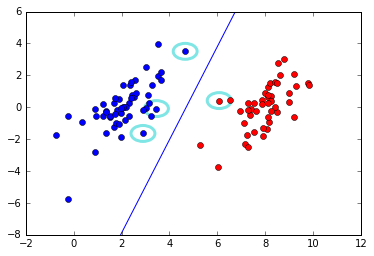

In [5]:
def plotSupportVectors(b, alphas):
    from matplotlib.patches import Circle
    
    dataArr, labelArr = loadDataSet("./datasets/chapter6_testset.txt")
    b = np.array(b)[0][0]
    alphaArr = np.array(alphas)
    sampleCount = len(labelArr)
    
    positiveMask = (labelArr == 1.0)
    negativeMask = (labelArr == -1.0)
    
    fig = plt.figure()
    ax = fig.add_subplot(111)

    ax.plot(dataArr[positiveMask, 0], dataArr[positiveMask, 1], 'ro')
    ax.plot(dataArr[negativeMask, 0], dataArr[negativeMask, 1], 'bo')
    
    # separating hyperplane
    w = np.zeros((1, 2))
    for i in range(sampleCount):
        w += alphaArr[i] * labelArr[i] * dataArr[i, :]
    
    x = np.arange(-2.0, 10.0, 0.1)
    y = (-w[0][0]*x - b)/w[0][1]
        
    plt.plot(x, y)
    
    # support vectors
    supportVectors = []
    for i in range(len(alphas)):
        if alphas[i] > 0.0:
            circle = Circle(dataArr[i, :], 0.5, facecolor='none', edgecolor=(0,0.8,0.8), linewidth=3, alpha=0.5)
            ax.add_patch(circle)
    
    ax.axis([-2, 12, -8, 6])
    plt.show()
    
plotSupportVectors(b, alphas)

우리가 만든 간단한 SMO가 잘 작동함을 확인하였습니다. 하지만 수렴하는 데 너무 오래 걸린다는 단점이 있죠.

Platt이 제안한 Full SMO를 사용하면 빠른 시간 안에 수렴하게 할 수 있습니다.

구현은 너무 복잡해서 같이 해보지는 않겠습니다. 각자 책을 보고 공부하시면 이해할 수 있을 것입니다!

svm.py에 구현되어 있는 smoP 함수가 바로 우리가 원하는 Full SMO입니다.

fullSet, iter: 0 i:0, pairs changed 1
fullSet, iter: 0 i:1, pairs changed 1
fullSet, iter: 0 i:2, pairs changed 2
fullSet, iter: 0 i:3, pairs changed 2
fullSet, iter: 0 i:4, pairs changed 3
fullSet, iter: 0 i:5, pairs changed 3
fullSet, iter: 0 i:6, pairs changed 3
fullSet, iter: 0 i:7, pairs changed 4
fullSet, iter: 0 i:8, pairs changed 4
fullSet, iter: 0 i:9, pairs changed 4
fullSet, iter: 0 i:10, pairs changed 4
fullSet, iter: 0 i:11, pairs changed 4
fullSet, iter: 0 i:12, pairs changed 4
fullSet, iter: 0 i:13, pairs changed 4
fullSet, iter: 0 i:14, pairs changed 4
fullSet, iter: 0 i:15, pairs changed 4
fullSet, iter: 0 i:16, pairs changed 4
fullSet, iter: 0 i:17, pairs changed 5
fullSet, iter: 0 i:18, pairs changed 5
fullSet, iter: 0 i:19, pairs changed 5
fullSet, iter: 0 i:20, pairs changed 5
fullSet, iter: 0 i:21, pairs changed 5
fullSet, iter: 0 i:22, pairs changed 5
fullSet, iter: 0 i:23, pairs changed 6
fullSet, iter: 0 i:24, pairs changed 6
fullSet, iter: 0 i:25, pairs change

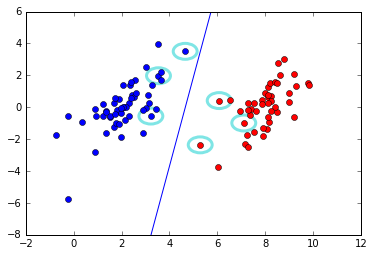

In [6]:
import sys
sys.path.append('./modules/')

from svm import smoP

dataArr, labelArr = loadDataSet("./datasets/chapter6_testset.txt")
b, alphas = smoP(dataArr, labelArr, C=0.6, toler=0.001, maxIter=40)

plotSupportVectors(b, alphas)